In [1]:
import pandas as pd ; import numpy as np

In [6]:
vs=pd.DataFrame({"anahtar1":list("aabbab"),
                "anahtar2":["bir","iki","uc"]*2,
                "veri1":np.random.randn(6),
                "veri2":np.random.randn(6)})
vs

,anahtar1,anahtar2,veri1,veri2
0,a,bir,-0.325992,-0.389698
1,a,iki,-0.683376,-2.883087
2,b,uc,0.280216,-0.637422
3,b,bir,-0.077224,0.815011
4,a,iki,-0.127254,-0.006573
5,b,uc,-0.522905,0.178433


In [8]:
grup=vs["veri1"].groupby(vs["anahtar1"])

In [4]:
grup

In [9]:
grup.mean()

anahtar1
a   -0.378874
b   -0.106638
Name: veri1, dtype: float64

In [10]:
ort=vs["veri1"].groupby([vs["anahtar1"],vs["anahtar2"]]).mean()
ort

anahtar1  anahtar2
a         bir        -0.325992
          iki        -0.405315
b         bir        -0.077224
          uc         -0.121345
Name: veri1, dtype: float64

In [11]:
#hiyerarşik görüntüyü tablo haline getirme

ort.unstack()

anahtar2,bir,iki,uc
anahtar1,,,
a,-0.325992,-0.405315,NaN
b,-0.077224,NaN,-0.121345


In [16]:
vs.groupby("anahtar1").mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11528\1170825289.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vs.groupby("anahtar1").mean()


,veri1,veri2
anahtar1,,
a,-0.378874,-1.093119
b,-0.106638,0.118674


In [13]:
vs.groupby(["anahtar1","anahtar2"]).mean()

veri1     veri2
anahtar1 anahtar2                    
a        bir      -0.325992 -0.389698
         iki      -0.405315 -1.444830
b        bir      -0.077224  0.815011
         uc       -0.121345 -0.229495

In [17]:
for isim, grup in vs.groupby("anahtar1"):
    print(isim)
    print(grup)

a
  anahtar1 anahtar2     veri1     veri2
0        a      bir -0.325992 -0.389698
1        a      iki -0.683376 -2.883087
4        a      iki -0.127254 -0.006573
b
  anahtar1 anahtar2     veri1     veri2
2        b       uc  0.280216 -0.637422
3        b      bir -0.077224  0.815011
5        b       uc -0.522905  0.178433


In [18]:
for (x1,x2), grup in vs.groupby(["anahtar1","anahtar2"]):
    print(x1,x2)
    print(grup)

a bir
  anahtar1 anahtar2     veri1     veri2
0        a      bir -0.325992 -0.389698
a iki
  anahtar1 anahtar2     veri1     veri2
1        a      iki -0.683376 -2.883087
4        a      iki -0.127254 -0.006573
b bir
  anahtar1 anahtar2     veri1     veri2
3        b      bir -0.077224  0.815011
b uc
  anahtar1 anahtar2     veri1     veri2
2        b       uc  0.280216 -0.637422
5        b       uc -0.522905  0.178433


In [19]:
parca=dict(list(vs.groupby("anahtar1")))

In [20]:
parca["a"]

,anahtar1,anahtar2,veri1,veri2
0,a,bir,-0.325992,-0.389698
1,a,iki,-0.683376,-2.883087
4,a,iki,-0.127254,-0.006573


In [21]:
oyun = pd.read_csv("vgsalesGlobale.csv")

In [25]:
oyun.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [26]:
oyun.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [32]:
#veri setindeki sayısal verilerin özet değerlerini eksik verileri kaldırarak görüntüleme

oyun.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [30]:
oyun.Global_Sales.mean()

0.5374406555006628

In [31]:
grup=oyun.groupby("Genre")

In [33]:
grup["Global_Sales"].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [35]:
grup["Global_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


In [36]:
grup.mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11528\626059466.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grup.mean()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,7973.879071,2007.909929,0.264726,0.158323,0.048236,0.056508,0.528100
Adventure,11532.787714,2008.130878,0.082271,0.049868,0.040490,0.013072,0.185879
Fighting,7646.511792,2004.630383,0.263667,0.119481,0.103007,0.043255,0.529375
Misc,8561.847039,2007.258480,0.235906,0.124198,0.061967,0.043312,0.465762
Platform,6927.251693,2003.820776,0.504571,0.227573,0.147596,0.058228,0.938341
Puzzle,9627.381443,2005.243433,0.212680,0.087251,0.098471,0.021564,0.420876
Racing,7961.515612,2004.840131,0.287766,0.190865,0.045388,0.061865,0.586101
Role-Playing,8086.174731,2007.055744,0.219946,0.126384,0.236767,0.040060,0.623233
Shooter,7369.367939,2005.918877,0.444733,0.239137,0.029221,0.078389,0.791885


In [38]:
#matplotlib bu satırda (inline komutu ile ) import edildi
%matplotlib inline

<AxesSubplot: xlabel='Genre'>

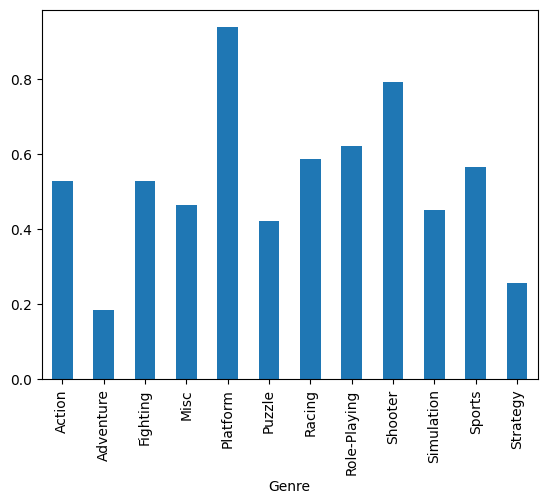

In [39]:
grup["Global_Sales"].mean().plot(kind="bar")